# Encoding Categorical Variables in ML

Encoding categorical variables is a crucial step in preparing data for machine learning models. Here’s why it’s important, followed by explanations of various encoding techniques:

### Why Encode Categorical Variables?

1. **Machine Learning Algorithms Require Numerical Input**:
   - Most machine learning algorithms work with numerical data. Categorical variables need to be converted into numerical representations for these algorithms to process them.

2. **Preserving Information**:
   - Encoding helps to preserve the information contained in categorical variables, making it accessible for the model to learn from.

3. **Improving Model Performance**:
   - Proper encoding can lead to better model performance by providing the algorithm with a more meaningful representation of categorical data.

4. **Handling Non-Numeric Data**:
   - Categorical data might represent important features (like customer segments or product types) that need to be converted into a format that models can interpret.

### Encoding Techniques

1. **OneHotEncoder**:
   - **Description**: Converts each category into a binary vector. Each category is represented as a vector with one '1' and the rest '0's.
   - **Example**: For a feature `Color` with values `['Red', 'Blue', 'Green']`, OneHotEncoding transforms it into:
     - Red: [1, 0, 0]
     - Blue: [0, 1, 0]
     - Green: [0, 0, 1]
   - **Use Case**: Best for categorical features without an inherent order.

2. **OrdinalEncoder**:
   - **Description**: Converts categories into integers based on their ordinal relationship. Categories are mapped to integer values according to their order.
   - **Example**: For a feature `Education` with values `['High School', 'Bachelors', 'Masters']`, OrdinalEncoding might transform it into:
     - High School: 0
     - Bachelors: 1
     - Masters: 2
   - **Use Case**: Best for categorical features with a natural order.

3. **MeanEncoder (Target Encoding)**:
   - **Description**: Replaces each category with the mean of the target variable for that category.
   - **Example**: For a feature `City` and a target `House Price`, if the mean house price in `City A` is $200,000, `City A` is encoded as 200,000.
   - **Use Case**: Useful for regression tasks where the categorical feature has a significant relationship with the target.

4. **CountFrequencyEncoder**:
   - **Description**: Replaces each category with the frequency of that category in the dataset.
   - **Example**: For a feature `Product Type` with values `['A', 'B', 'A', 'C']`, it would be encoded as:
     - A: 2
     - B: 1
     - C: 1
   - **Use Case**: Useful for features where the frequency of occurrence can provide insight into the category’s importance.

5. **RareLabelEncoder**:
   - **Description**: Groups infrequent categories into a single "Rare" category to handle categories that have very few occurrences.
   - **Example**: For a feature `Country` with many countries, those appearing less frequently than a certain threshold might be grouped into `Rare`.
   - **Use Case**: Useful for features with many categories where some categories are too rare to be useful on their own.

6. **WoEEncoder (Weight of Evidence Encoding)**:
   - **Description**: Encodes categories based on the Weight of Evidence (WoE), which measures the relationship between a categorical feature and the target variable.
   - **Example**: For a feature `Credit Score` with `Good` and `Bad` categories, WoE might encode `Good` as a positive value and `Bad` as a negative value based on the proportion of good and bad outcomes.
   - **Use Case**: Common in credit scoring and binary classification problems, where the relationship between categories and the target is important.

Each encoding method has its use cases and suitability depending on the type of machine learning problem and the nature of the categorical data.


## 1. Import Libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.encoding import (
    OneHotEncoder, 
    OrdinalEncoder, 
    MeanEncoder, 
    CountFrequencyEncoder,
    RareLabelEncoder,
    WoEEncoder
)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

We'll use a synthetic dataset that includes categorical variables.

In [ ]:
# Create a sample dataset
np.random.seed(42)
data = {
    'City': ['London', 'Paris', 'Paris', 'Paris', 'London', 'Paris', 'Paris', 'New York', 'London', 'London'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'Purchased': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Salary': [70000, 80000, 120000, 90000, 60000, 110000, 100000, 50000, 75000, 65000]
}

df = pd.DataFrame(data)
print("Initial Dataset with Categorical Variables:")
df.head(10)

## 3. Split Data into Training and Testing Sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
print("Training Set:")
X_train.head()

## 4. Encoding Categorical Variables

### 4.1 One-Hot Encoding

`OneHotEncoder` creates binary (0 or 1) variables for each category in the categorical variable.


In [ ]:
one_hot_encoder = OneHotEncoder(variables=['City', 'Gender'], drop_last=True)
X_train_encoded = one_hot_encoder.fit_transform(X_train)
print("Dataset after One-Hot Encoding:")
X_train_encoded.head()

### 4.2 Ordinal Encoding

`OrdinalEncoder` assigns numerical values to categories based on their frequency or a custom order.


In [ ]:
X_train.groupby('City').agg({'Salary':'mean'})

In [ ]:
Y = X_train['Salary']
X = X_train.drop(['Purchased'],axis=1)

ordinal_encoder = OrdinalEncoder(encoding_method='ordered', variables=['City'])
X_train_encoded = ordinal_encoder.fit_transform(X,Y)
print("Dataset after Ordinal Encoding:")
X_train_encoded.head()

In [ ]:
ordinal_encoder.encoder_dict_

### 4.3 Mean Encoding

`MeanEncoder` replaces categories with the mean of the target variable within each category.

In [ ]:
X_train.groupby('City').agg({'Salary':'mean'})

In [ ]:
mean_encoder = MeanEncoder(variables=['City', 'Gender'])
X_train_encoded = mean_encoder.fit_transform(X_train, X_train['Salary'])
print("Dataset after Mean Encoding:")
X_train_encoded.head()

In [ ]:
mean_encoder.encoder_dict_

### 4.4 Count-Frequency Encoding

`CountFrequencyEncoder` encodes categories as the count or frequency of the categories in the dataset.


In [37]:
count_freq_encoder = CountFrequencyEncoder(encoding_method='frequency', variables=['City', 'Gender'])
X_train_encoded = count_freq_encoder.fit_transform(X_train)
print("Dataset after Count-Frequency Encoding:")
X_train_encoded.head()

Dataset after Count-Frequency Encoding:


,City,Gender,Purchased,Salary
1,0.555556,0.444444,No,80000
5,0.555556,0.444444,No,110000
0,0.333333,0.555556,Yes,70000
7,0.111111,0.555556,No,50000
2,0.555556,0.444444,Yes,120000


In [39]:
X_train['City'].value_counts()

City
Paris       5
London      3
New York    1
Name: count, dtype: int64

In [38]:
count_freq_encoder.encoder_dict_

{'City': {'Paris': 0.5555555555555556,
  'London': 0.3333333333333333,
  'New York': 0.1111111111111111},
 'Gender': {'Male': 0.5555555555555556, 'Female': 0.4444444444444444}}

### 4.5 Rare Label Encoding

`RareLabelEncoder` groups infrequent categories into a single category, which is helpful when dealing with rare labels.

In [42]:
rare_label_encoder = RareLabelEncoder(tol=0.2, n_categories=2, variables=['City'])
X_train_encoded = rare_label_encoder.fit_transform(X_train)
print("Dataset after Rare Label Encoding:")
X_train_encoded.head()

Dataset after Rare Label Encoding:


,City,Gender,Purchased,Salary
1,Paris,Female,No,80000
5,Paris,Female,No,110000
0,London,Male,Yes,70000
7,Rare,Male,No,50000
2,Paris,Female,Yes,120000


In [43]:
X_train_encoded['City'].unique()

array(['Paris', 'London', 'Rare'], dtype=object)

In [44]:
rare_label_encoder.encoder_dict_

{'City': ['Paris', 'London']}

### 4.6 Weight of Evidence (WoE) Encoding

`WoEEncoder` replaces categories with the weight of evidence, which is particularly useful for binary classification problems.

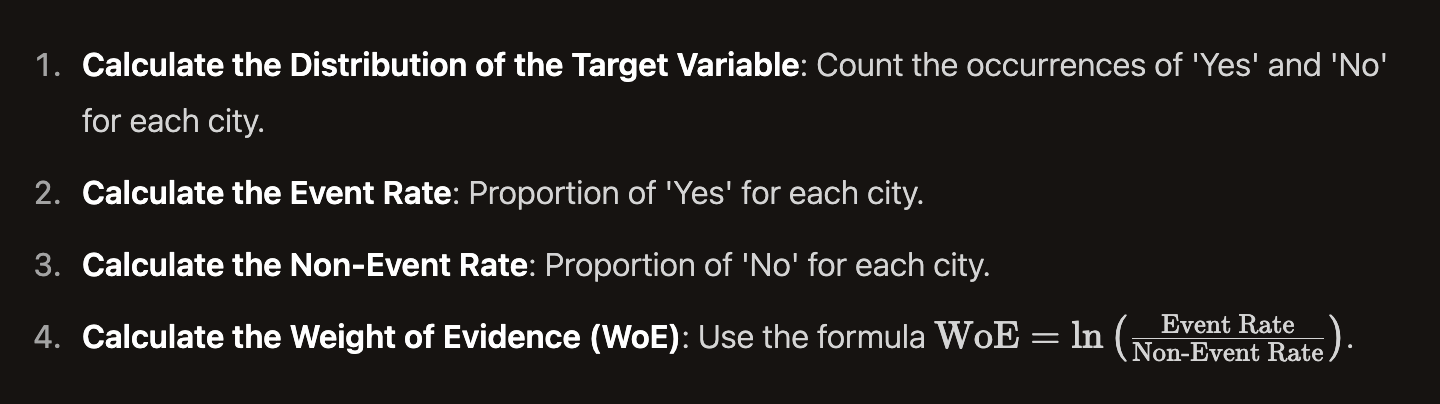

In [45]:
woe_encoder = WoEEncoder(variables=['Gender','City'],fill_value=0.001)
X_train_encoded = woe_encoder.fit_transform(X_train, X_train['Purchased'])
print("Dataset after WoE Encoding:")
X_train_encoded.head()

Dataset after WoE Encoding:


,City,Gender,Purchased,Salary
1,-0.182322,0.223144,No,80000
5,-0.182322,0.223144,No,110000
0,0.223144,-0.875469,Yes,70000
7,-5.298317,-0.875469,No,50000
2,-0.182322,0.223144,Yes,120000


In [46]:
woe_encoder.encoder_dict_

{'Gender': {'Female': 0.22314355131420976, 'Male': -0.8754687373538999},
 'City': {'London': 0.22314355131420976,
  'New York': -5.298317366548036,
  'Paris': -0.1823215567939546}}

## 5. Conclusion

This notebook has demonstrated several techniques for encoding categorical variables using the `feature_engine` library. Each method has its specific use case and can be chosen based on the particular needs of the dataset and the machine learning model being used.


In [ ]:
# Save the final encoded dataset
X_train_encoded.to_csv('encoded_dataset.csv', index=False)